In [46]:
import pandas as pd

In [47]:
df = pd.read_csv("./Final Dataset.csv", sep=",", encoding="UTF-8", header=0)

In [48]:
#print first 5 values
df.head()

,CustomerID,Age,Gender,State,City,Product,Tier
0,1,19,Male,Maharashtra,Navi Mumbai,fashion,1
1,2,21,Male,Maharashtra,Raigad,art,3
2,3,20,Female,Maharashtra,Mumbai,sports_equipement,1
3,4,23,Female,Karnataka,Bangalore,baby,1
4,5,31,Female,Gujarat,Jamnagar,houseware,2


In [49]:
#check if there are spelling errors
df.City.value_counts()

Mumbai           45
Delhi            29
Jaipur           17
Bangalore        15
Kolkata          13
Chandigarh       12
Chennai          12
Lucknow          10
Pune             10
Ahemedabad       10
Raigad            8
Mysore            8
Nagpur            7
Gurgaon           6
Panaji            6
Navi Mumbai       5
Varanasi          4
Vizag             4
Jamnagar          4
Kharagpur         3
Vasco             3
Hyderabad         2
Ajmer             2
Kolhapur          2
Kochi             2
Chandigad         2
Mumbi             1
Mubai             1
Gurugram          1
Visakhapatnam     1
delhi             1
Jamshedpur        1
Mysor             1
Cochi             1
Name: City, dtype: int64

Following mistakes have been observed:
Mumbai - Mubai, Mumbi;
Delhi - delhi;
Mysore - Mysore;
Kochi - Cochi;
Chandigarh - Chandigad;

In [50]:
#correcting the typos
df.City = df.City.apply(lambda x: 'Mumbai' if x == 'Mubai' else x)
df.City = df.City.apply(lambda x: 'Mumbai' if x == 'Mumbi' else x)
df.City = df.City.apply(lambda x: 'Mysore' if x == 'Mysor' else x)
df.City = df.City.apply(lambda x: 'Chandigarh' if x == 'Chandigad' else x)
df.City = df.City.apply(lambda x: 'Kochi' if x == 'Cochi' else x)
df.City = df.City.apply(lambda x: 'Delhi' if x == 'delhi' else x)


df.City.value_counts()

Mumbai           47
Delhi            30
Jaipur           17
Bangalore        15
Chandigarh       14
Kolkata          13
Chennai          12
Lucknow          10
Ahemedabad       10
Pune             10
Mysore            9
Raigad            8
Nagpur            7
Panaji            6
Gurgaon           6
Navi Mumbai       5
Jamnagar          4
Vizag             4
Varanasi          4
Kochi             3
Vasco             3
Kharagpur         3
Hyderabad         2
Ajmer             2
Kolhapur          2
Gurugram          1
Visakhapatnam     1
Jamshedpur        1
Name: City, dtype: int64

In [51]:
df.shape

(249, 7)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  249 non-null    int64 
 1   Age         249 non-null    int64 
 2   Gender      249 non-null    object
 3   State       249 non-null    object
 4   City        249 non-null    object
 5   Product     249 non-null    object
 6   Tier        249 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 13.7+ KB


In [53]:
df.describe()

,CustomerID,Age,Tier
count,249.000000,249.000000,249.000000
mean,125.000000,39.767068,1.461847
std,72.024301,14.687125,0.581598
min,1.000000,18.000000,1.000000
25%,63.000000,28.000000,1.000000
50%,125.000000,38.000000,1.000000
75%,187.000000,49.000000,2.000000
max,249.000000,70.000000,3.000000


In [54]:
df.isnull().sum()

CustomerID    0
Age           0
Gender        0
State         0
City          0
Product       0
Tier          0
dtype: int64

In [55]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

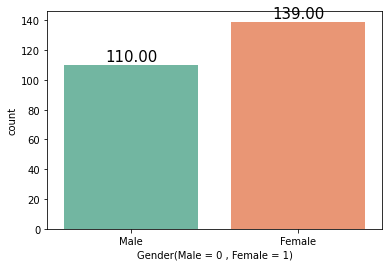

In [56]:
plots = sns.countplot(x='Gender',data=df,palette="Set2")
plt.xlabel("Gender(Male = 0 , Female = 1)")

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                   ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    
plt.show()

In [57]:
df['Gender'] = df['Gender'].map({'Male':0 ,'Female':1})
malecount = len(df[df.Gender == 0])
femalecount = len(df[df.Gender == 1])
print("percentage of male: {:.2f}%".format(malecount/len(df.Gender)*100))
print("percentage of female: {:.2f}%".format(femalecount/len(df.Gender)*100))


percentage of male: 44.18%
percentage of female: 55.82%


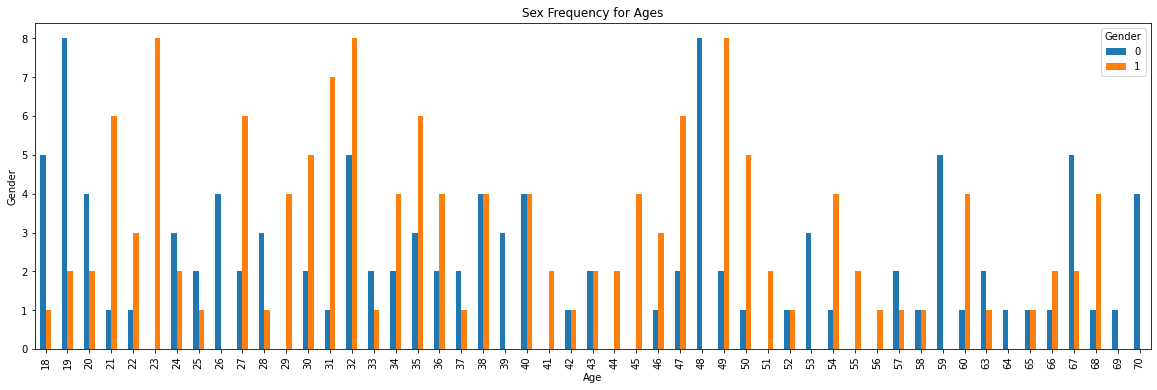

In [58]:
pd.crosstab(df.Age,df.Gender).plot(kind="bar",figsize=(20,6))
plt.title('Sex Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.show()

In [59]:
df.head()

,CustomerID,Age,Gender,State,City,Product,Tier
0,1,19,0,Maharashtra,Navi Mumbai,fashion,1
1,2,21,0,Maharashtra,Raigad,art,3
2,3,20,1,Maharashtra,Mumbai,sports_equipement,1
3,4,23,1,Karnataka,Bangalore,baby,1
4,5,31,1,Gujarat,Jamnagar,houseware,2


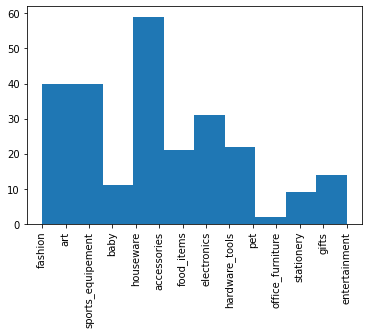

In [60]:
x = df['Product']
plt.xticks(rotation=90)
plt.hist(x)
plt.show()

Houseware is the most sold product category <br />
Pet and office_furniture is the least sold <br />
Fashion, art, sports_equipement and electronics are median categories

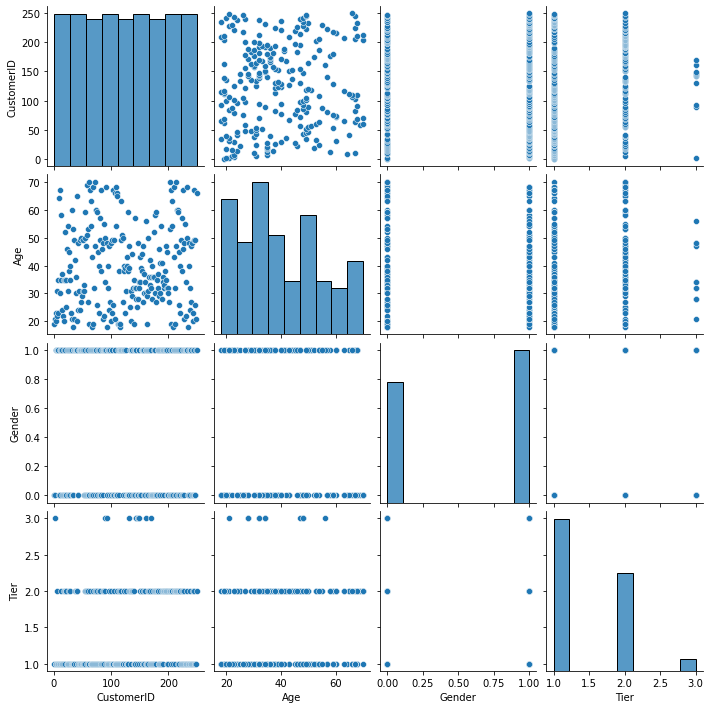

In [61]:
g = sns.pairplot(df)
plt.show()

            CustomerID       Age    Gender      Tier
CustomerID    1.000000  0.056068 -0.039829  0.155845
Age           0.056068  1.000000 -0.046689  0.058434
Gender       -0.039829 -0.046689  1.000000 -0.016675
Tier          0.155845  0.058434 -0.016675  1.000000


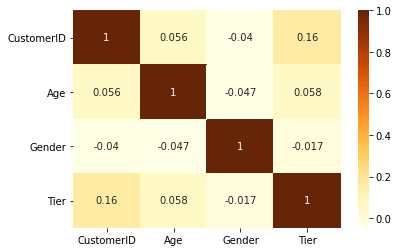

In [62]:
print(df.corr())
dataplot = sns.heatmap(df.corr(), cmap="YlOrBr", annot=True)
plt.show()

In [63]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['State', 'City', 'Product']


Hence these 3 columns are the Categorical Variables which need to prepare them for ml model use

In [64]:
df.dtypes

CustomerID     int64
Age            int64
Gender         int64
State         object
City          object
Product       object
Tier           int64
dtype: object

In [65]:
#label encoding

from sklearn.preprocessing import StandardScaler , LabelEncoder

label = LabelEncoder()
df['State'] = label.fit_transform(df['State'])
df['City'] = label.fit_transform(df['City'])
df['Product'] = label.fit_transform(df['Product'])

#scaling

scaler = StandardScaler()
#X_scaled=scaler.fit_transform(X)

In [66]:
df.dtypes

CustomerID    int64
Age           int64
Gender        int64
State         int32
City          int32
Product       int32
Tier          int64
dtype: object

In [67]:
df.head()

,CustomerID,Age,Gender,State,City,Product,Tier
0,1,19,0,8,20,5,1
1,2,21,0,8,23,1,3
2,3,20,1,8,17,12,1
3,4,23,1,6,2,2,1
4,5,31,1,3,10,9,2


In [68]:
from sklearn.model_selection import train_test_split

y = df['Product']
X = df.drop(labels=['Product'],axis=1)

# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
#def score_dataset(X_train, X_valid, y_train, y_valid):
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
preds = model.predict(X_valid)

#print("MAE Label Encoding:") 
#print(mean_absolute_error(y_valid, preds))

In [71]:
y_pred=model.predict(X_valid)
y_pred

array([9.41, 5.53, 5.49, 6.57, 8.2 , 4.77, 9.56, 7.66, 8.35, 6.14, 5.21,
       5.56, 4.53, 6.06, 8.02, 7.64, 4.59, 6.8 , 8.69, 4.47, 7.53, 5.46,
       7.9 , 4.61, 4.57, 6.56, 5.29, 5.23, 3.9 , 8.07, 7.22, 6.26, 8.22,
       8.25, 6.3 , 4.93, 5.53, 5.89, 6.14, 9.76, 8.94, 7.79, 6.65, 9.79,
       7.77, 5.4 , 9.21, 3.95, 4.67, 6.98])